## 12CO and 13CO Mass Spectrum of Outflows

Let's first assume the 12co is optically thin and get the outflow mass as a function of velocity, then do the same for 13co. The resulting plot should show some sort of power-law slope, perhaps the 13co mass spectrum will be offset by some amount from the 12co mass spectrum, which would reflect the opacity correction factor for 12co. The mass spectrum is discussed in detail in Arce & Goodman (2001) and Dunham et al. (2014). 

First, let's pick TWO outflows to test out this method. I'll use the same V380 Ori-NE outflow as in the Physics_of_Outflows notebook, and also use the new outflow candidate I identified around HOPS 160. Let's look at these outflows now.

In [10]:
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.insert(0, "..")
from stamp import *
from physics import *
matplotlib.style.use("presentation")
c12 = SpectralCube.read("../../cubes/mask_imfit_12co_pix_2_Tmb.fits")

t_hops = Table.read("../../catalogs/hops.fits")
c12 = SpectralCube.read("../../cubes/mask_imfit_12co_pix_2_Tmb.fits")
c13_regrid = SpectralCube.read("../../cubes/mask_imfit_13co_pix_2_Tmb_regrid12co.fits")
c13 = SpectralCube.read("../../cubes/mask_imfit_13co_pix_2_Tmb.fits")
c18 = SpectralCube.read("../../cubes/mask_imfit_c18o_pix_2_Tmb.fits")
print(c12.header['DATE-OBS'], c13.header['DATE-OBS'], SpectralCube.read("../../cubes/mask_imfit_13co_pix_2_Tmb.fits").header['DATE-OBS'], SpectralCube.read("../../cubes/mask_imfit_c18o_pix_2_Tmb.fits").header['DATE-OBS'])
sig12, sig13 = 0.86*u.K, 0.64*u.K

hops_169 = t_hops[t_hops["HOPS"] == 169][0]
coord_169 = SkyCoord(hops_169["RAJ2000"], hops_169["DEJ2000"], unit=u.deg)
print(coord_169)
hops_160 = t_hops[t_hops["HOPS"] == 160][0]
coord_160 = SkyCoord(hops_160["RAJ2000"], hops_160["DEJ2000"], unit=u.deg)

1985-02-15T03:11:26.2 1984-09-21T23:22:32.4 1984-09-21T23:22:32.4 1985-07-02T06:03:42.6
<SkyCoord (ICRS): (ra, dec) in deg
    (84.1505, -6.6477)>


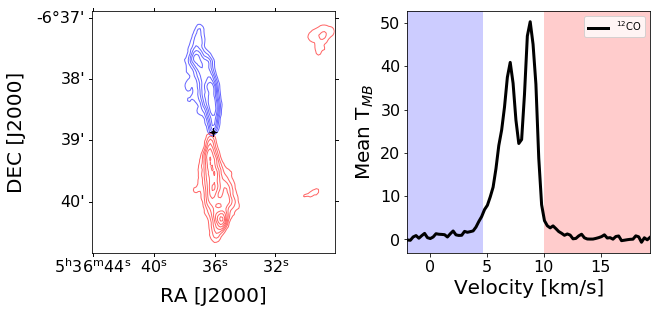

In [11]:
do_fit = 0
nsigma_vel = 2.
blue_vel = 4.7*u.km/u.s
red_vel = 10*u.km/u.s
fit_radius = 15*u.arcsec
width = height = 4*u.arcmin
start = 10.
stop = 50.
step = 5.
fig = plt.figure(figsize=(10,5))
plot_finder(c12, coord=coord_169,
            fit_cube=c12, fit_radius=fit_radius,
            nsigma_vel=nsigma_vel, blue_vel=blue_vel, red_vel=red_vel,
            fit_spectrum=do_fit, channel_sigma=sig12,
            region_width=width, region_height=height,
            blue_levels=np.arange(start, stop+step, step), red_levels=np.arange(start, stop+step, step),
            show_stamp=True, show_catalogs=True, show_spectrum=True, show_fit=do_fit,
            show_fitcircle=False, show_vrange=True, interactive=False, show_name=False,
            show_contour=1, show_redblue=0, show_outflows=False, redblue_mode='subtract',
            imshow_kwargs={"cmap":"RdBu_r", "interpolation":"none"},
            blue_contour_kwargs={'colors':'blue', 'linewidths':1, 'alpha':0.6, 'zorder':3},
            red_contour_kwargs={'colors':'red', 'linewidths':1, 'alpha':0.6, 'zorder':3},
            fig=fig, savefig=False, verbose=False, autoguess=True,
            spec_label=r'$^{12}$CO'
            )
plt.show()

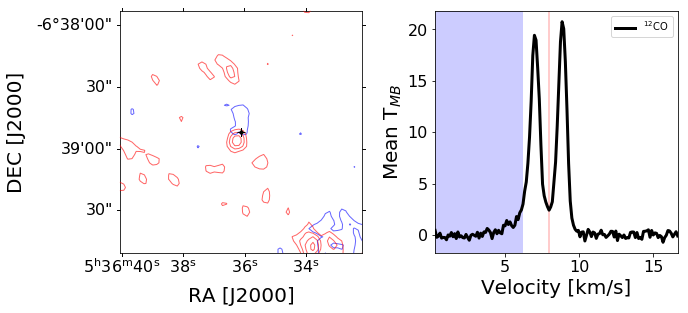

In [12]:
do_fit = 0
nsigma_vel = 2.
blue_vel = 6.2*u.km/u.s
red_vel = [7.9,8.]*u.km/u.s
fit_radius = 15*u.arcsec
width = height = 2*u.arcmin
start = 15.
stop = 50.
step = 5.
fig = plt.figure(figsize=(10,5))
plot_finder(c13, coord=coord_169,
            fit_cube=c13, fit_radius=fit_radius,
            nsigma_vel=nsigma_vel, blue_vel=blue_vel, red_vel=red_vel,
            fit_spectrum=do_fit, channel_sigma=0.34*u.K,
            region_width=width, region_height=height,
            blue_levels=np.arange(start, stop+step, step), red_levels=np.arange(start, stop+step, step),
            show_stamp=True, show_catalogs=True, show_spectrum=True, show_fit=do_fit,
            show_fitcircle=False, show_vrange=True, interactive=False, show_name=False,
            show_contour=1, show_redblue=0, show_outflows=False, redblue_mode='subtract',
            imshow_kwargs={"cmap":"RdBu_r", "interpolation":"none"},
            blue_contour_kwargs={'colors':'blue', 'linewidths':1, 'alpha':0.6, 'zorder':3},
            red_contour_kwargs={'colors':'red', 'linewidths':1, 'alpha':0.6, 'zorder':3},
            fig=fig, savefig=False, verbose=False, autoguess=True,
            spec_label=r'$^{12}$CO'
            )
plt.show()

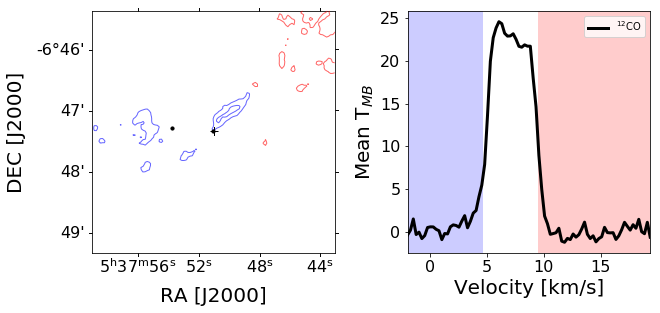

In [5]:
do_fit = 0
nsigma_vel = 3
blue_vel = 4.7*u.km/u.s
red_vel = 9.5*u.km/u.s
fit_radius = 15*u.arcsec
width = height = 4*u.arcmin
start = 10.
stop = 50.
step = 5.
fig = plt.figure(figsize=(10,5))
plot_finder(c12, coord=coord_160,
            fit_cube=c12, fit_radius=fit_radius,
            nsigma_vel=nsigma_vel, blue_vel=blue_vel, red_vel=red_vel,
            fit_spectrum=do_fit, channel_sigma=sig12,
            region_width=width, region_height=height,
            blue_levels=np.arange(start, stop+step, step), red_levels=np.arange(start, stop+step, step),
            show_stamp=True, show_catalogs=True, show_spectrum=True, show_fit=do_fit,
            show_fitcircle=False, show_vrange=True, interactive=False, show_name=False,
            show_contour=1, show_redblue=0, show_outflows=False, redblue_mode='rgb',
            redblue_sigscale=1, rscale=[0.1,1], bscale=[0.1,0.9],
            imshow_kwargs={"cmap":"RdBu_r", "interpolation":"none", 'vmin':0, 'vmax':0.1},
            blue_contour_kwargs={'colors':'blue', 'linewidths':1, 'alpha':0.6, 'zorder':3},
            red_contour_kwargs={'colors':'red', 'linewidths':1, 'alpha':0.6, 'zorder':3},
            fig=fig, savefig=False, verbose=False, autoguess=True,
            spec_label=r'$^{12}$CO'
            )
plt.show()

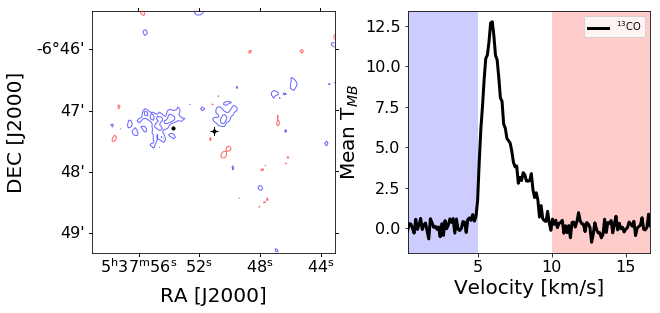

In [6]:
do_fit = 0
nsigma_vel = 3
blue_vel = 5.*u.km/u.s
red_vel = 10*u.km/u.s
fit_radius = 15*u.arcsec
width = height = 4*u.arcmin
start = 10.
stop = 50.
step = 5.
fig = plt.figure(figsize=(10,5))
plot_finder(c13, coord=coord_160,
            fit_cube=c13, fit_radius=fit_radius,
            nsigma_vel=nsigma_vel, blue_vel=blue_vel, red_vel=red_vel,
            fit_spectrum=do_fit, channel_sigma=0.34*u.K,
            region_width=width, region_height=height,
            blue_levels=np.arange(start, stop+step, step), red_levels=np.arange(start, stop+step, step),
            show_stamp=True, show_catalogs=True, show_spectrum=True, show_fit=do_fit,
            show_fitcircle=False, show_vrange=True, interactive=False, show_name=False,
            show_contour=1, show_redblue=0, show_outflows=False, redblue_mode='rgb',
            redblue_sigscale=1, rscale=[0.1,1], bscale=[0.1,0.9],
            imshow_kwargs={"cmap":"RdBu_r", "interpolation":"none", 'vmin':0, 'vmax':0.1},
            blue_contour_kwargs={'colors':'blue', 'linewidths':1, 'alpha':0.6, 'zorder':3},
            red_contour_kwargs={'colors':'red', 'linewidths':1, 'alpha':0.6, 'zorder':3},
            fig=fig, savefig=False, verbose=False, autoguess=True,
            spec_label=r'$^{13}$CO'
            )
plt.show()

In [7]:
sub12_hops169 = extract_subcube(c12, region_class=RectangleSkyRegion,
                      region_kwargs=dict(center=coord_169, width=width, height=height))
sub13_hops169 = extract_subcube(c13, region_class=RectangleSkyRegion,
                        region_kwargs=dict(center=coord_169, width=width, height=height))
sub13regrid_hops169 = extract_subcube(c13_regrid, region_class=RectangleSkyRegion,
                        region_kwargs=dict(center=coord_169, width=width, height=height))
sub18_hops169 = extract_subcube(c18, region_class=RectangleSkyRegion,
                      region_kwargs=dict(center=coord_169, width=width, height=height))
sub18small_hops169 = extract_subcube(sub18_hops169, region_class=CircleSkyRegion,
                                    region_kwargs=dict(center=coord_169, radius=15*u.arcsec))

### Fitting the C18O spectrum to get the mean cloud velocity. 

Guessing these parameters:  {'amplitude': 4.8685207, 'mean': 6.970812196153415, 'stddev': 1.650210038202597}
Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude            mean              stddev      
    ----------------- ----------------- -------------------
    3.470569816126643 7.002847444534497 0.27787234460433174


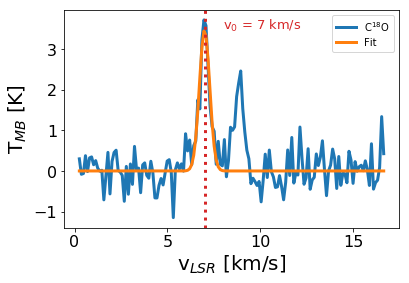

In [8]:
spec18_mean = extract_spectrum(sub18small_hops169, spectral_unit=u.km/u.s)
x, y = spec18_mean.spectral_axis.value, spec18_mean.value
spec18_gauss = fit_gaussian(spec18_mean.spectral_axis.value, spec18_mean.value, autoguess=True)

print(spec18_gauss)
plt.plot(x, y, label=r"C$^{18}$O")
plt.plot(x,spec18_gauss(x), label=r"Fit")
plt.ylabel(r"T$_{MB}$ [K]")
plt.xlabel(r"v$_{LSR}$ [km/s]")
plt.axvline(spec18_gauss.mean, color='tab:red', ls=':')
plt.text(8,3.5,r"v$_0$ = {:.3g} km/s".format(spec18_gauss.mean.value), color='tab:red', size=13)
plt.legend()

### Find Blue Lobe Mask

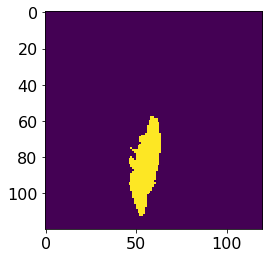

In [9]:

blue_vel = 4.7*u.km/u.s
blueslab12_hops169 = sub12_hops169.spectral_slab(-2*u.km/u.s, 4.7*u.km/u.s)
noise12_vrange = [19,20]*u.km/u.s
rms12 = rms(sub12_hops169, noise12_vrange)
rms13_regrid = rms(sub13regrid_hops169, [0, 2]*u.km/u.s)
bluemom012_hops169 = blueslab12_hops169.moment0()
bluemom012rms_hops169 = rms_mom0(blueslab12_hops169, rms12)
mask_bluelobe = bluemom012_hops169 > 10*bluemom012rms_hops169
np.save("mask_bluelobe", mask_bluelobe)
plt.imshow(mask_bluelobe)

### Excitation Velocity, Can Fit a Gaussian or Just Find the Peak

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude            mean             stddev      
    ----------------- ----------------- ------------------
    30.06775667588137 7673.865805959726 1614.4966209186937
Maximum: 34.5963020324707 K
Fit peak: 30.06775667588137
38.114463503410846 K 33.5768932848379


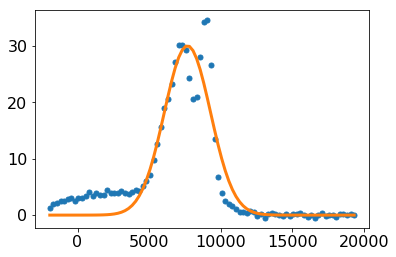

In [9]:
spec12_bluelobe = extract_spectrum(sub12_hops169.with_mask(mask_bluelobe))
x, y = spec12_bluelobe.spectral_axis.value, spec12_bluelobe.value
spec12_gauss = fit_gaussian(x, y, gaussian_kwargs={'amplitude':30, 'mean':7000, 'stddev':1000})
print(spec12_gauss)
plt.plot(x,y, '.')
plt.plot(x, spec12_gauss(x))
print("Maximum:",spec12_bluelobe.max())
print("Fit peak:", spec12_gauss.amplitude.value)
Tpeak_max = spec12_bluelobe.max()
Tpeak_fit = spec12_gauss.amplitude.value
Tex_max, Tex_fit = Tex(Tpeak_max), Tex(Tpeak_fit)
print(Tex_max, Tex_fit)

### Calculate N_H2 and Mass using both 12 and 13CO assuming everything is optically thin.

In [10]:
sub12_nH2_thin = column_density_H2(sub12_hops169, Tex=Tex_max, moment0=False,
                                  molecule='12co')
sub13_nH2_thin = column_density_H2(sub13regrid_hops169, Tex=Tex_max, moment0=False,
                                  molecule='13co')
# factor = 195.1390781389135 * u.GHz**2 * u.s**3 / (u.K * u.m**3)
mask12_3sig = sub12_hops169 > 3*rms12
mask13regrid_3sig = sub13regrid_hops169 > 3*rms13_regrid

Text(0.5, 1.0, 'Full Velocity Range, NH2(13CO))')

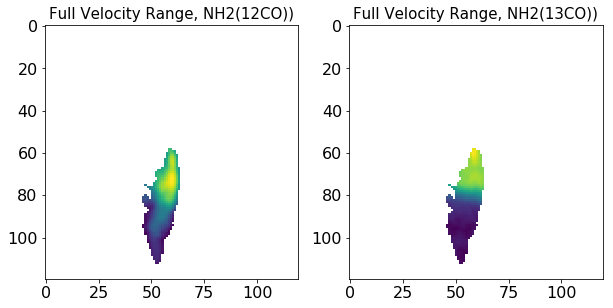

In [11]:
sub12_nH2_thin_bluelobe = sub12_nH2_thin.with_mask(mask_bluelobe).with_mask(mask12_3sig)
sub13_nH2_thin_bluelobe = sub13_nH2_thin.with_mask(mask_bluelobe).with_mask(mask13regrid_3sig)
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(sub12_nH2_thin_bluelobe.moment0().data)
ax[0].set_title("Full Velocity Range, NH2(12CO))", size=15)
ax[1].imshow(sub13_nH2_thin_bluelobe.moment0().data)
ax[1].set_title("Full Velocity Range, NH2(13CO))", size=15)

0.000555555576728 deg 1.6114262734958815e-05 pc2


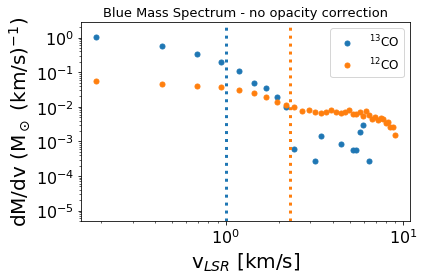

In [12]:
m = 2.34e-24*u.gram
pixel_angle = sub12_nH2_thin_bluelobe.header['CDELT2']*u.deg
pixel_area = (pixel_angle.to(u.radian).value * 414*u.pc) ** 2.
print(pixel_angle, pixel_area)
mass12_thin_bluelobe = (sub12_nH2_thin_bluelobe.with_spectral_unit(u.km/u.s) * m * pixel_area).to(u.Msun / (u.km/u.s))
mass13_thin_bluelobe = (sub13_nH2_thin_bluelobe.with_spectral_unit(u.km/u.s) * m * pixel_area).to(u.Msun / (u.km/u.s))
dmdv12_thin_bluelobe = mass12_thin_bluelobe.sum((1,2))
dmdv13_thin_bluelobe = mass13_thin_bluelobe.sum((1,2))
plt.plot(7 - dmdv13_thin_bluelobe.spectral_axis.value, dmdv13_thin_bluelobe.value, '.', label=r"$^{13}$CO")
plt.plot(7 - dmdv12_thin_bluelobe.spectral_axis.value, dmdv12_thin_bluelobe.value, '.', label=r"$^{12}$CO")
# plt.xlim(100,10000)
plt.xlabel(r"v$_{LSR}$ [km/s]")
plt.ylabel(r"dM/dv (M$_\odot$ (km/s)$^{-1}$)")
plt.loglog()
plt.legend(fontsize=12)
plt.axvline(7-4.7, c='tab:orange', ls=':')
plt.axvline(7-6, c='tab:blue', ls=':')
plt.title("Blue Mass Spectrum - no opacity correction", size=13)
plt.tight_layout()
plt.savefig("dmdv_blue_hops169.png")
# dmdv12_thin_bluelobe.with_spectral_unit(u.km/u.s)

### Red Lobe Mass Spectrum

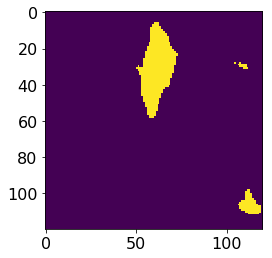

In [70]:
red_vel = 10*u.km/u.s
redslab12_hops169 = sub12_hops169.spectral_slab(10*u.km/u.s, 20*u.km/u.s)
noise12_vrange = [19,20]*u.km/u.s
rms12 = rms(sub12_hops169, noise12_vrange)

rms13_regrid = rms(sub13regrid_hops169, [0, 2]*u.km/u.s)
redmom012_hops169 = redslab12_hops169.moment0()
redmom012rms_hops169 = rms_mom0(redslab12_hops169, rms12)
mask_redlobe = (redmom012_hops169 > 10*redmom012rms_hops169)
np.save("mask_redlobe", mask_redlobe)
fig, ax = plt.subplots(1)
ax.imshow(redmom012_hops169.data)
ax.imshow(mask_redlobe)

In [14]:
sub12_nH2_thin_redlobe = sub12_nH2_thin.with_mask(mask_redlobe).with_mask(mask12_3sig)
sub13_nH2_thin_redlobe = sub13_nH2_thin.with_mask(mask_redlobe).with_mask(mask13regrid_3sig)

Text(0.5, 1.0, 'Full Velocity Range, NH2(13CO))')

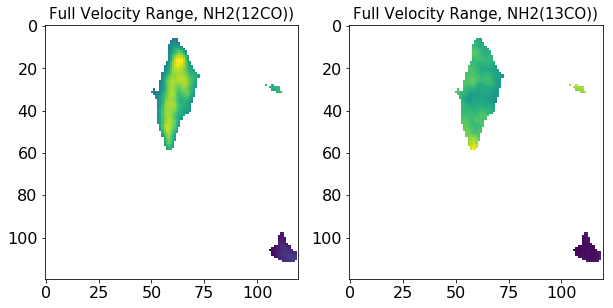

In [15]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(sub12_nH2_thin_redlobe.moment0().data)
ax[0].set_title("Full Velocity Range, NH2(12CO))", size=15)
ax[1].imshow(sub13_nH2_thin_redlobe.moment0().data)
ax[1].set_title("Full Velocity Range, NH2(13CO))", size=15)

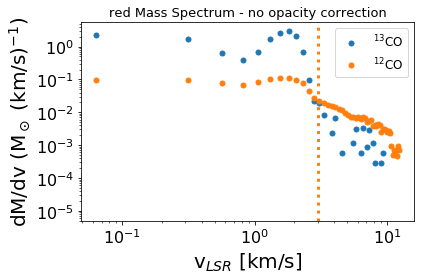

In [16]:
mass12_thin_redlobe = (sub12_nH2_thin_redlobe.with_spectral_unit(u.km/u.s) * m * pixel_area).to(u.Msun / (u.km/u.s))
mass13_thin_redlobe = (sub13_nH2_thin_redlobe.with_spectral_unit(u.km/u.s) * m * pixel_area).to(u.Msun / (u.km/u.s))
dmdv12_thin_redlobe = mass12_thin_redlobe.sum((1,2))
dmdv13_thin_redlobe = mass13_thin_redlobe.sum((1,2))
plt.plot(dmdv13_thin_redlobe.spectral_axis.value-7, dmdv13_thin_redlobe.value, '.', label=r"$^{13}$CO")
plt.plot(dmdv12_thin_redlobe.spectral_axis.value-7, dmdv12_thin_redlobe.value, '.', label=r"$^{12}$CO")
# plt.xlim(100,10000)
plt.xlabel(r"v$_{LSR}$ [km/s]")
plt.ylabel(r"dM/dv (M$_\odot$ (km/s)$^{-1}$)")
plt.loglog()
plt.legend(fontsize=12)
plt.axvline(10-7, c='tab:orange', ls=':')
# plt.axvline(7-6, c='tab:red', ls=':')
plt.title("red Mass Spectrum - no opacity correction", size=13)
plt.tight_layout()
plt.savefig("dmdv_red_hops169.png")
# dmdv12_thin_redlobe.with_spectral_unit(u.km/u.s)

Text(0.5, 1.0, 'red Mass Spectrum - no opacity correction')

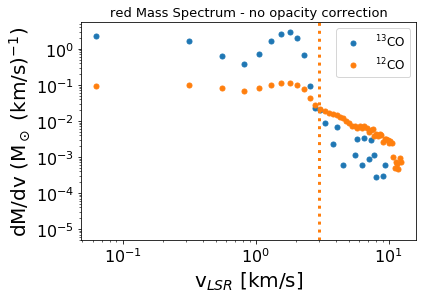

In [17]:
mass12_thin_redlobe = (sub12_nH2_thin_redlobe.with_spectral_unit(u.km/u.s) * m * pixel_area).to(u.Msun / (u.km/u.s))
mass13_thin_redlobe = (sub13_nH2_thin_redlobe.with_spectral_unit(u.km/u.s) * m * pixel_area).to(u.Msun / (u.km/u.s))
dmdv12_thin_redlobe = mass12_thin_redlobe.sum((1,2))
dmdv13_thin_redlobe = mass13_thin_redlobe.sum((1,2))
plt.plot(dmdv13_thin_redlobe.spectral_axis.value-7, dmdv13_thin_redlobe.value, '.', label=r"$^{13}$CO")
plt.plot(dmdv12_thin_redlobe.spectral_axis.value-7, dmdv12_thin_redlobe.value, '.', label=r"$^{12}$CO")
# plt.xlim(100,10000)
plt.xlabel(r"v$_{LSR}$ [km/s]")
plt.ylabel(r"dM/dv (M$_\odot$ (km/s)$^{-1}$)")
plt.loglog()
plt.legend(fontsize=12)
plt.axvline(10-7, c='tab:orange', ls=':')
# plt.axvline(7-6, c='tab:red', ls=':')
plt.title("red Mass Spectrum - no opacity correction", size=13)
# dmdv12_thin_redlobe.with_spectral_unit(u.km/u.s)

Total H2 Mass from 12co above 10 km/s (not opacity-corrected): 0.05267360433936119 solMass


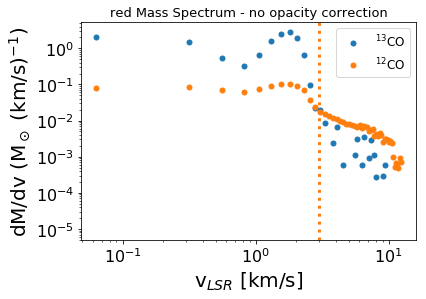

In [18]:
# mask12_3sig = (sub12_hops169 > 3*0.86*u.K)
mask_redlobe = (np.indices(sub12_hops169.shape)[2] < 90) & mask_redlobe
dmdv12, masscube12 = dmdv(sub12_hops169.with_mask(mask_redlobe).with_mask(mask12_3sig),
    molecule='12co', Tex=Tex_max, return_cube=True)
dmdv13, masscube13 = dmdv(sub13regrid_hops169.with_mask(mask_redlobe).with_mask(mask13regrid_3sig),
    molecule='13co', Tex=Tex_max, return_cube=True)


plt.plot(dmdv13.spectral_axis.value-7, dmdv13.value, '.', label=r"$^{13}$CO")
plt.plot(dmdv12.spectral_axis.value-7, dmdv12.value, '.', label=r"$^{12}$CO")
# plt.xlim(100,10000)
plt.xlabel(r"v$_{LSR}$ [km/s]")
plt.ylabel(r"dM/dv (M$_\odot$ (km/s)$^{-1}$)")
plt.loglog()
plt.legend(fontsize=12)
plt.axvline(10-7, c='tab:orange', ls=':')
# plt.axvline(7-6, c='tab:red', ls=':')
plt.title("red Mass Spectrum - no opacity correction", size=13)
print("Total H2 Mass from 12co above 10 km/s (not opacity-corrected):",
      masscube12.spectral_slab(10.*u.km/u.s, 18*u.km/u.s).sum()*0.25*u.km/u.s)

### With Opacity Correction
12co is optically thick at low velocities. In OpacityCorrection, I show how to use the ratio of 12co/13co to calculate a velocity-dependent opacity correction. The function `physics.opacity_correct` implements this method. The remaining decision is just what region to calculate the opacity correction over. Zhang et al. (2016) only use the pixels in the outflow, while Dunham et al. (2014) and Arce and Goodman (2001) imply they are less restrictive with the region used for the opacity determination.

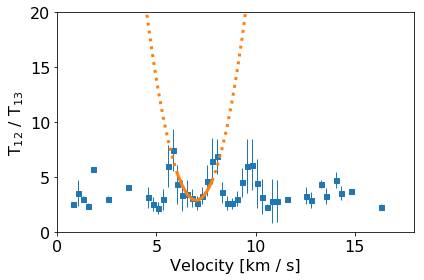

In [34]:
#Determining opacity correction factor using the entire area around the outflow:
vsys = spec18_gauss.mean*u.km/u.s
sub12_hops169_correctarea, factor = opacity_correct(sub12_hops169, sub13regrid_hops169, snr_cutoff=3.,
                                       return_factor=True, vsys=vsys, plot_ratio="ratio_hops169_4arcminarea_3sig.pdf",
                                       errorbar_kwargs=dict(markersize=5, marker='s', ls='', lw=1, zorder=0),
                                       plot_kwargs=dict(c='tab:orange'))

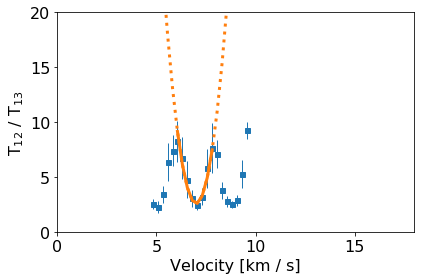

In [33]:
sub12_hops169_correctout, factor_out = opacity_correct(sub12_hops169.with_mask(mask_redlobe | mask_bluelobe), 
                                          sub13regrid_hops169.with_mask(mask_redlobe | mask_bluelobe),
                                          snr_cutoff=3., vsys=vsys, plot_ratio='ratio_hops169_outflowarea_5sig.pdf',
                                          errorbar_kwargs=dict(markersize=5, marker='s', ls='', lw=1, zorder=0),           
                                          plot_kwargs=dict(c='tab:orange'),
                                          return_factor=True)

Total H2 Mass from 12CO above 10 km/s: (optically thin) 0.054 solMass, (outflow opacity) 0.054 solMass, (4 arcmin opacity) 0.067 solMass


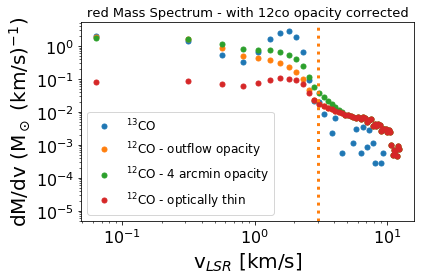

In [65]:
dmdv12, masscube12 = dmdv(sub12_hops169.with_mask(mask_redlobe).with_mask(mask12_3sig),
    molecule='12co', Tex=Tex_max, return_cube=True)
dmdv12_correctout, masscube12_correctout = dmdv(sub12_hops169_correctout.with_mask(mask_redlobe).with_mask(mask12_3sig),
    molecule='12co', Tex=Tex_max, return_cube=True)
dmdv12_correctarea, masscube12_correctarea = dmdv(sub12_hops169_correctarea.with_mask(mask_redlobe).with_mask(mask12_3sig),
    molecule='12co', Tex=Tex_max, return_cube=True)
dmdv13, masscube13 = dmdv(sub13regrid_hops169.with_mask(mask_redlobe).with_mask(mask13regrid_3sig),
    molecule='13co', Tex=Tex_max, return_cube=True)

plt.plot(dmdv13.spectral_axis.value-7, dmdv13.value, '.', ms=10, label=r"$^{13}$CO")
plt.plot(dmdv12_correctout.spectral_axis.value-7, dmdv12_correctout.value, '.', label=r"$^{12}$CO - outflow opacity")
plt.plot(dmdv12_correctarea.spectral_axis.value-7, dmdv12_correctarea.value, '.', label=r"$^{12}$CO - 4 arcmin opacity")
plt.plot(dmdv12.spectral_axis.value-7, dmdv12.value, '.', label=r"$^{12}$CO - optically thin")
# plt.xlim(100,10000)
plt.xlabel(r"v$_{LSR}$ [km/s]")
plt.ylabel(r"dM/dv (M$_\odot$ (km/s)$^{-1}$)")
plt.loglog()
plt.legend(fontsize=12)
plt.axvline(10-7, c='tab:orange', ls=':')
# plt.axvline(7-6, c='tab:red', ls=':')
plt.title("red Mass Spectrum - with 12co opacity corrected", size=13)
print("Total H2 Mass from 12CO above 10 km/s: (optically thin) {:.2g}, (outflow opacity) {:.2g}, (4 arcmin opacity) {:.2g}".format(
      masscube12.spectral_slab(10*u.km/u.s, 20*u.km/u.s).sum()*0.25*u.km/u.s,
      masscube12_correctout.spectral_slab(10*u.km/u.s, 20*u.km/u.s).sum()*0.25*u.km/u.s,
      masscube12_correctarea.spectral_slab(10*u.km/u.s, 20*u.km/u.s).sum()*0.25*u.km/u.s))
plt.tight_layout()
plt.savefig("dmdv_red_opacity.png", dpi=400)

Total H2 Mass from 12CO below 4.7 km/s: (optically thin) 0.042 solMass, (outflow opacity) 0.045 solMass, (4 arcmin opacity) 0.067 solMass


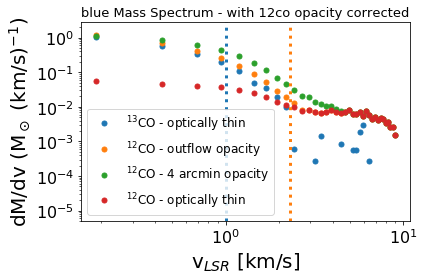

In [69]:
dmdv12, masscube12 = dmdv(sub12_hops169.with_mask(mask_bluelobe).with_mask(mask12_3sig),
    molecule='12co', Tex=Tex_max, return_cube=True)
dmdv12_correctout, masscube12_correctout = dmdv(sub12_hops169_correctout.with_mask(mask_bluelobe).with_mask(mask12_3sig),
    molecule='12co', Tex=Tex_max, return_cube=True)
dmdv12_correctarea, masscube12_correctarea = dmdv(sub12_hops169_correctarea.with_mask(mask_bluelobe).with_mask(mask12_3sig),
    molecule='12co', Tex=Tex_max, return_cube=True)
dmdv13, masscube13 = dmdv(sub13regrid_hops169.with_mask(mask_bluelobe).with_mask(mask13regrid_3sig),
    molecule='13co', Tex=Tex_max, return_cube=True)

plt.plot(-dmdv13.spectral_axis.value+7, dmdv13.value, '.', ms=10, label=r"$^{13}$CO - optically thin")
plt.plot(-dmdv12_correctout.spectral_axis.value+7, dmdv12_correctout.value, '.', label=r"$^{12}$CO - outflow opacity")
plt.plot(-dmdv12_correctarea.spectral_axis.value+7, dmdv12_correctarea.value, '.', label=r"$^{12}$CO - 4 arcmin opacity")
plt.plot(-dmdv12.spectral_axis.value+7, dmdv12.value, '.', label=r"$^{12}$CO - optically thin")
# plt.xlim(100,10000)
plt.xlabel(r"v$_{LSR}$ [km/s]")
plt.ylabel(r"dM/dv (M$_\odot$ (km/s)$^{-1}$)")
plt.loglog()
plt.legend(fontsize=12)
plt.axvline(7-4.7, c='tab:orange', ls=':')
plt.axvline(7-6, c='tab:blue', ls=':')
# plt.axvline(7-6, c='tab:blue', ls=':')
plt.title("blue Mass Spectrum - with 12co opacity corrected", size=13)
print("Total H2 Mass from 12CO below 4.7 km/s: (optically thin) {:.2g}, (outflow opacity) {:.2g}, (4 arcmin opacity) {:.2g}".format(
      masscube12.spectral_slab(-2*u.km/u.s, 4.7*u.km/u.s).sum()*0.25*u.km/u.s,
      masscube12_correctout.spectral_slab(-2*u.km/u.s, 4.7*u.km/u.s).sum()*0.25*u.km/u.s,
      masscube12_correctarea.spectral_slab(-2*u.km/u.s, 4.7*u.km/u.s).sum()*0.25*u.km/u.s))
plt.tight_layout()
plt.savefig("dmdv_blue_opacity.png", dpi=400)

In [14]:
c12.allow_huge_operations = True
spec = c12.mean((1,2))

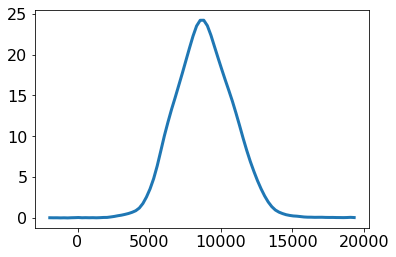

In [35]:
plt.plot(spec.spectral_axis.value, spec.value)


blue = c12.spectral_slab(-2*u.km/u.s, 3*u.km/u.s).moment0()
red = c12.spectral_slab(15*u.km/u.s, 20*u.km/u.s).moment0()

In [36]:
blue.write("12co_-2to3kms_mom0.fits", overwrite=True)
red.write("12co_15to20kms_mom0.fits", overwrite=True)